In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

plt.style.use('default')
sns.set(style="whitegrid") # tipo de grid seaborn

In [2]:
path_clicks = 'clicks.csv.gzip'
clicks = pd.read_csv(path_clicks, compression='gzip')

In [3]:
clicks.shape

(26351, 20)

In [4]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 20 columns):
advertiser_id      26351 non-null int64
action_id          0 non-null float64
source_id          26351 non-null int64
created            26351 non-null object
country_code       26351 non-null int64
latitude           26351 non-null float64
longitude          26351 non-null float64
wifi_connection    26351 non-null bool
carrier_id         26340 non-null float64
trans_id           26351 non-null object
os_minor           26339 non-null float64
agent_device       3243 non-null float64
os_major           26339 non-null float64
specs_brand        26351 non-null int64
brand              6235 non-null float64
timeToClick        22977 non-null float64
touchX             23011 non-null float64
touchY             23011 non-null float64
ref_type           26351 non-null int64
ref_hash           26351 non-null int64
dtypes: bool(1), float64(11), int64(6), object(2)
memory usage: 3.8+ MB


In [18]:
clicks.head(10)

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,...,touchX,touchY,ref_type,ref_hash,timestamp_format,date,month,weekday_name,day,hour
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,...,0.905,0.078,1891515180541284343,1904083516767779093,2019-03-06 22:42:12.755,2019-03-06,3,Wednesday,6,22
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,...,NaN,NaN,1891515180541284343,3086509764961796666,2019-03-08 10:24:30.641,2019-03-08,3,Friday,8,10
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,...,0.946,0.473,1891515180541284343,6958163894863846647,2019-03-08 15:24:16.069,2019-03-08,3,Friday,8,15
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,...,0.035,0.431,1891515180541284343,4368617728156436525,2019-03-06 03:08:51.543,2019-03-06,3,Wednesday,6,3
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,...,0.054,0.423,1891515180541284343,4368617728156436525,2019-03-06 03:32:55.570,2019-03-06,3,Wednesday,6,3
5,5,NaN,4,2019-03-07T18:02:25.833Z,6333597102633388268,1.209638,1.064208,False,27.0,dhc5iaRvlrI9OgkXDWnMRrAY47xWozY,...,0.606,0.459,1891515180541284343,7925959310979071406,2019-03-07 18:02:25.833,2019-03-07,3,Thursday,7,18
6,3,NaN,1,2019-03-12T15:17:04.453Z,6333597102633388268,1.209638,1.064208,False,27.0,cOm-_s2_6NkoDWYNu_QaMk-v4sf34h4,...,NaN,NaN,1891515180541284343,1709687652740629839,2019-03-12 15:17:04.453,2019-03-12,3,Tuesday,12,15
7,1,NaN,2,2019-03-06T19:15:47.249Z,6333597102633388268,1.205393,1.077238,False,NaN,MbDYk_2nKmKtOQgAIRx-aDJ66VIGsrE,...,NaN,NaN,1891515180541284343,2127839020694198991,2019-03-06 19:15:47.249,2019-03-06,3,Wednesday,6,19
8,3,NaN,0,2019-03-07T23:11:01.934Z,6333597102633388268,1.205058,1.077332,False,19.0,1wsFgNNvk6PT1QSSIdmmwmqp0E3k7io,...,0.889,0.977,1891515180541284343,5073558237453939035,2019-03-07 23:11:01.934,2019-03-07,3,Thursday,7,23
9,3,NaN,1,2019-03-07T23:06:30.642Z,6333597102633388268,1.205689,1.070234,False,18.0,ZLZz1XHsA5Xkuq_TXNfT49j_H4mfTwg,...,0.466,0.985,1891515180541284343,70349377423764005,2019-03-07 23:06:30.642,2019-03-07,3,Thursday,7,23


In [6]:
clicks.describe()

,advertiser_id,action_id,source_id,country_code,latitude,longitude,carrier_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
count,26351.000000,0.0,26351.000000,2.635100e+04,26351.000000,26351.000000,26340.000000,2.633900e+04,3.243000e+03,2.633900e+04,2.635100e+04,6235.000000,22977.000000,23011.000000,23011.000000,2.635100e+04,2.635100e+04
mean,2.991993,NaN,1.245266,6.333597e+18,1.206906,1.070233,7.743812,4.635375e+18,4.171028e+18,3.913451e+18,1.299055e+18,1.482277,230.403309,0.638784,1.478656,1.888100e+18,4.611581e+18
std,0.164070,NaN,2.188948,2.089000e+05,0.004484,0.001896,7.017027,1.642969e+18,2.460496e+18,1.885866e+18,1.149672e+18,1.583764,976.849149,0.301983,2.622727,1.721252e+17,2.673175e+18
min,0.000000,NaN,0.000000,6.333597e+18,1.205058,1.058204,0.000000,6.666626e+17,4.513618e+16,7.436481e+17,3.921844e+17,0.000000,0.017000,0.000000,0.000000,1.494519e+18,9.286192e+14
25%,3.000000,NaN,0.000000,6.333597e+18,1.205689,1.070234,3.000000,3.378640e+18,1.975183e+18,1.774085e+18,3.921844e+17,0.000000,2.915000,0.426000,0.183000,1.891515e+18,2.273798e+18
50%,3.000000,NaN,0.000000,6.333597e+18,1.205689,1.070234,6.000000,3.511538e+18,3.516812e+18,3.072849e+18,3.921844e+17,1.000000,10.588000,0.726000,0.645000,1.891515e+18,4.623721e+18
75%,3.000000,NaN,1.000000,6.333597e+18,1.205689,1.070234,13.000000,6.391567e+18,6.589622e+18,4.566454e+18,2.733036e+18,2.000000,71.703000,0.901000,0.991000,1.891515e+18,6.917850e+18
max,8.000000,NaN,10.000000,6.333597e+18,1.237861,1.085358,116.000000,9.081082e+18,9.221733e+18,7.499732e+18,8.930605e+18,13.000000,17616.188000,1.000000,16.600000,6.323872e+18,9.221118e+18


action_id son todos NaN. Por lo menos el 75% de los advertiser_id es 3, lo mismo sucede en country_code con 6.333597e+18. La latitud y longitud tienen una variacion estandar minuscula que hace que no sirvan los datos.

In [7]:
# Damos formato a la fecha.
clicks['timestamp_format'] = pd.to_datetime(clicks['created'])

# Agrego columna fecha
clicks['date'] = clicks['timestamp_format'].dt.date
# Agrego columna de mes.
clicks['month'] = clicks['timestamp_format'].dt.month
# Agrego columna nombre dia.
clicks['weekday_name'] = clicks['timestamp_format'].dt.weekday_name
# Agrego columna numero dia.
clicks['day'] = clicks['timestamp_format'].dt.day
# Agrego columna de horas
clicks['hour'] = clicks['timestamp_format'].dt.hour

In [8]:
# fecha minima
clicks['timestamp_format'].min()

Timestamp('2019-03-05 01:17:30.663000')

In [9]:
# fecha maxima
clicks['timestamp_format'].max()

Timestamp('2019-03-13 23:59:59.298000')

Los primeros datos son del 5 de marzo de 2019 y el ultimo del 13 de marzo de 2019 (ambos dias limites estan incluidos en el rango de datos validos)

# Cuantas clicks se realizaron por dia?

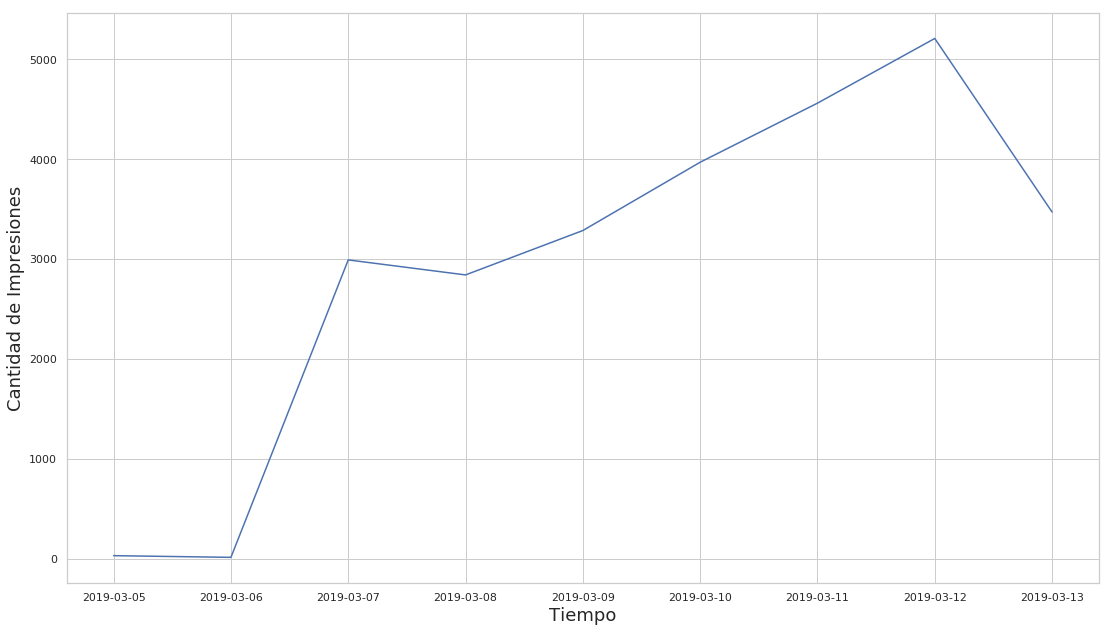

In [59]:
clicks_por_dia = clicks.groupby('date')['advertiser_id'].count()
g = clicks_por_dia.plot()
g.set_xlabel("Tiempo", fontsize=18)
g.set_ylabel("Cantidad de Impresiones", fontsize=18)

g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/cant_clicks_por_dia.png')

# Cual es el promedio de tiempo que tarda un usuario en hacer click sobre la publicidad segun el dia y hora?

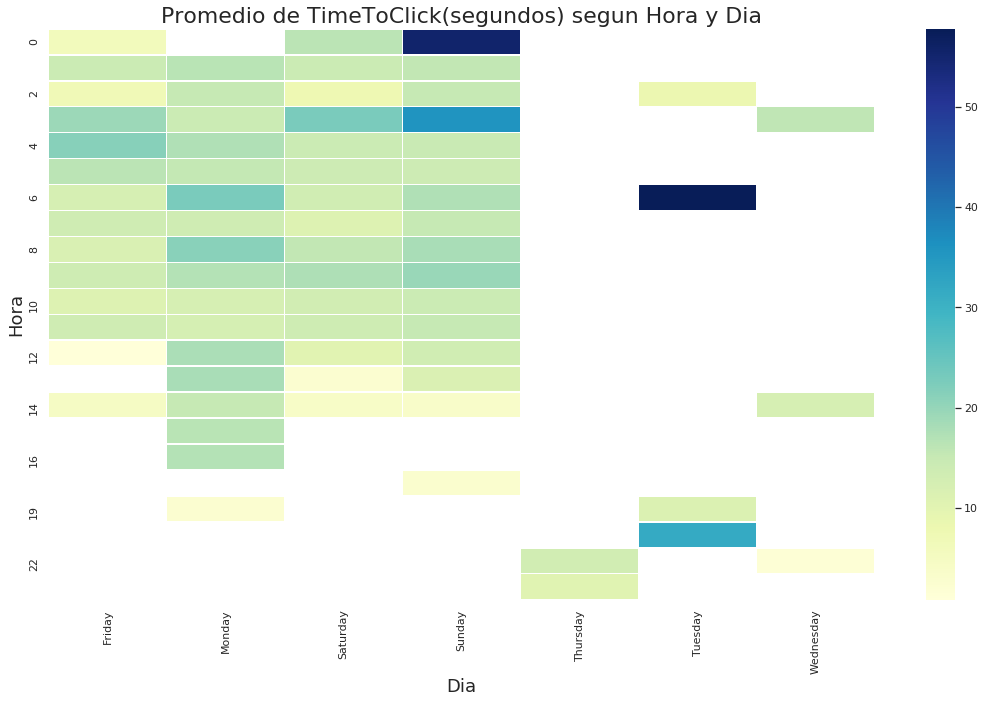

In [10]:
### Promedio de TimeToClick por combinacion de hora en el dia.
# Filtro los dias 12 y 13 para que justo haya 1 semana de data
tabla_semanal = clicks.loc[clicks['day'] < 12,:]
# Filtro los NaN
tabla_semanal['timeToClick'].dropna()
tabla_semanal_menor_90 = tabla_semanal.loc[tabla_semanal['timeToClick'] < 90, :]
for_heatmap_hr_day = tabla_semanal_menor_90.pivot_table(index='hour', columns='weekday_name', values='timeToClick', aggfunc='mean')

g = sns.heatmap(for_heatmap_hr_day , linewidths=.5, cmap="YlGnBu") # annot=True
g.set_title("Promedio de TimeToClick(segundos) segun Hora y Dia", fontsize=22)
g.set_xlabel("Dia",fontsize=18)
g.set_ylabel("Hora", fontsize=18)


g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/timeToClick_hr_dia.png')

# Top 10 Usuarios que mas clicks hicieron

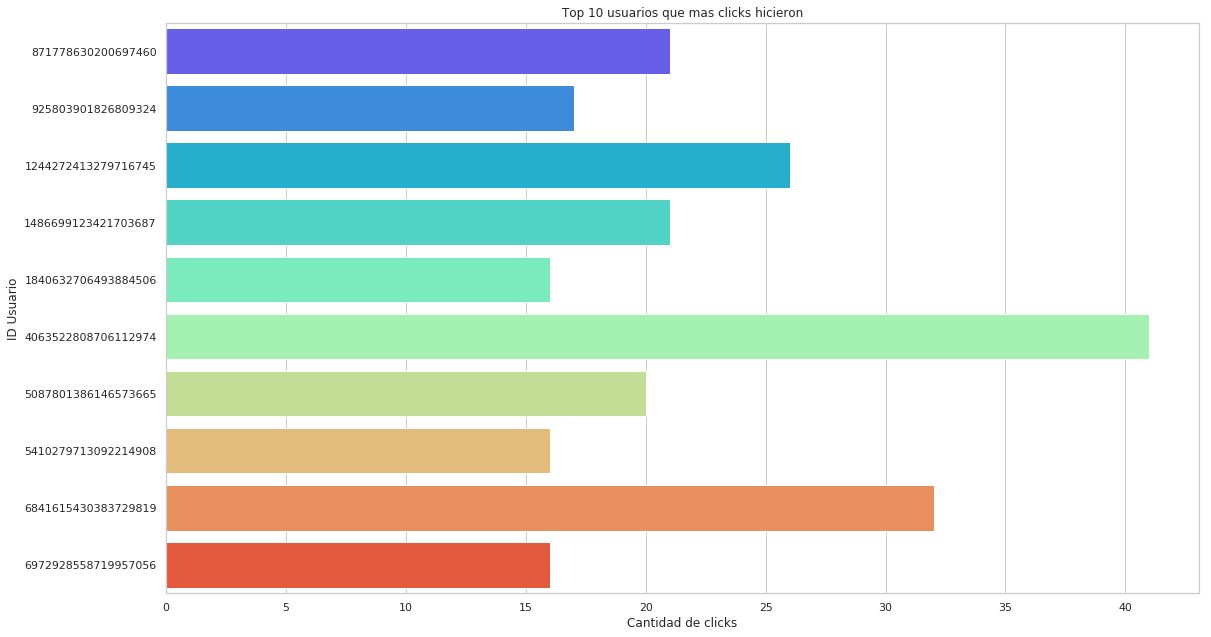

In [49]:
usuarios = clicks.groupby('ref_hash')['advertiser_id'].agg('count').sort_values(ascending=False)[:10]
g = sns.barplot(x=usuarios.values, y=usuarios.index, palette='rainbow', orient='h')
g.set_xlabel('Cantidad de clicks')
g.set_ylabel('ID Usuario')
g.set_title('Top 10 usuarios que mas clicks hicieron')


g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/top_10_usuarios_clicks.png')

# Top advertisers cuya publicidad fue clickeada

In [25]:
clicks.groupby('advertiser_id')['advertiser_id'].agg('count')

advertiser_id
0       70
1        2
2       12
3    26263
5        1
7        2
8        1
Name: advertiser_id, dtype: int64

El cliente de Jampp cuya publicidad fue la mas clickeada es el que esta identificado con el numero 3.

# Existe una relacion entre el tiempo que tarda en clickear un user y el tipo de conexion del telefono?

In [26]:
clicks.groupby('wifi_connection')['timeToClick'].agg('count')

wifi_connection
False    22977
Name: timeToClick, dtype: int64

Todos los clicks sobre las distintas publicidades fueron realizados cuando el telefono no tenia conexion wifi, por lo que suponemos que todos los usuarios que clickearon sobre una publicidad se encontraban viajando en ese momento.

# Cuantos clicks hay segun el advertising type?

In [28]:
clicks.groupby('ref_type')['advertising_id'].agg('count')

ref_type
1494519392962156891      739
1891515180541284343    25549
5016171802147987303       58
6323871695571587575        5
Name: advertiser_id, dtype: int64

Hay un tipo de advertising id que sobresale.

# Distribucion de brands de telefono sobre los distintos adversiters

In [46]:
tabla_counter = clicks.groupby(['advertiser_id', 'brand'], as_index=False)['latitude'].agg('count')
tabla_counter

,advertiser_id,brand,latitude
0,0,0.0,1
1,0,1.0,2
2,0,2.0,7
3,2,0.0,1
4,2,1.0,1
5,3,0.0,1915
6,3,1.0,1517
7,3,2.0,2020
8,3,3.0,186
9,3,4.0,240


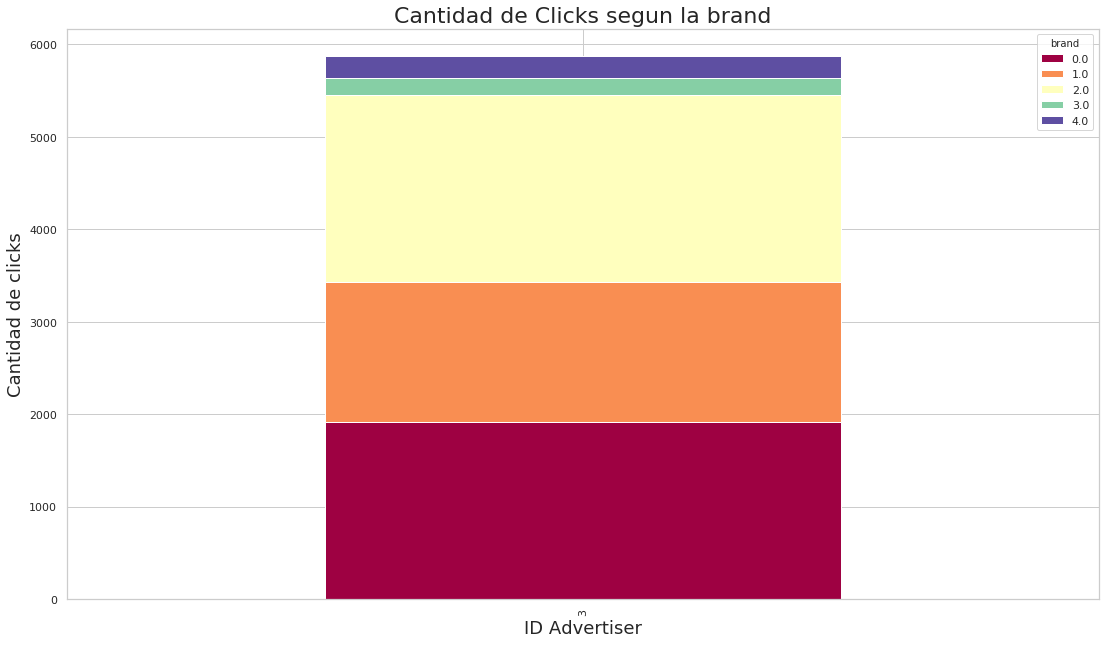

In [47]:
# Filtro datos
tabla_counter = tabla_counter.loc[(tabla_counter['advertiser_id'] == 3) & (tabla_counter['latitude'] > 150)]

pivoted = pd.pivot_table(tabla_counter,values='latitude',columns='brand', \
                         index='advertiser_id')

f = plt.figure()
plt.title('Cantidad de Clicks segun la brand', fontsize=22)
ax = pivoted.plot(kind='bar', stacked=True, colormap='Spectral', figsize=(18.5, 10.5), ax=f.gca())
ax.set_ylabel('Cantidad de clicks', fontsize=18);
ax.set_xlabel('ID Advertiser', fontsize=18);
plt.show()

g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/distribucion_brands_sobre_advertisers.png')

# Cuales son los Ad Exchange que generan mas clicks por hora?

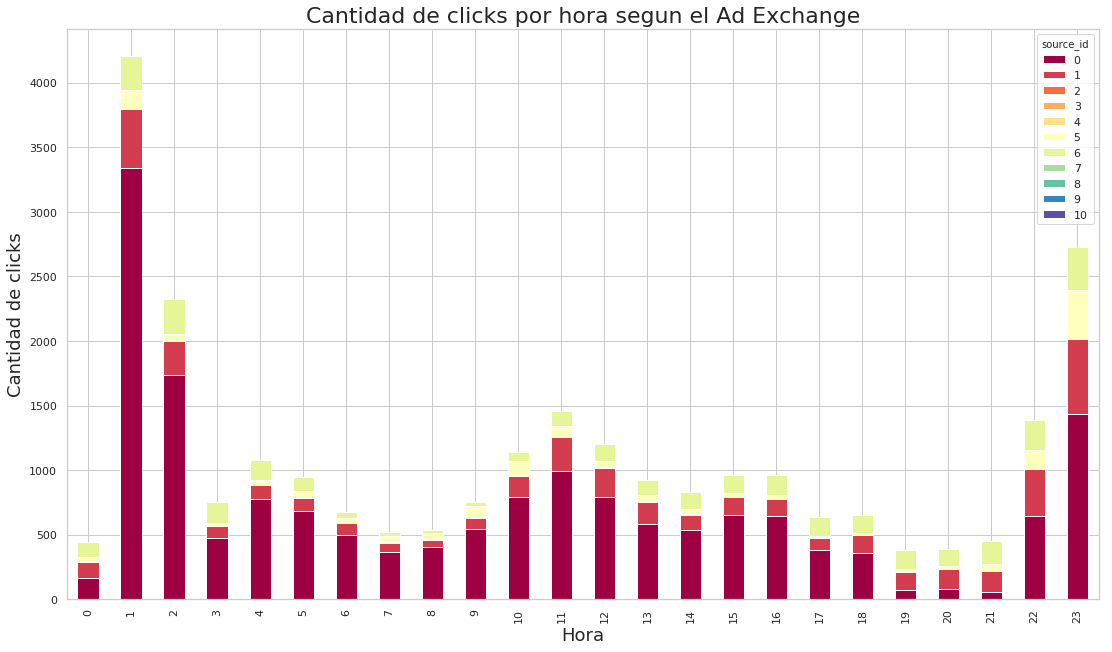

In [67]:
# Eventos por hora (campaing source)
source_por_hora = clicks.groupby(['hour', 'source_id'], as_index=False)['advertiser_id'].count()

# Pivot table.
pivotedHour = pd.pivot_table(source_por_hora,values='advertiser_id',columns='source_id', \
                         index='hour')
# Plot
f = plt.figure()
plt.title('Cantidad de clicks por hora segun el Ad Exchange', fontsize=22)
ax = pivotedHour.plot(kind='bar', stacked=True, colormap='Spectral', figsize=(18.5,10.5), ax=f.gca())
ax.set_ylabel('Cantidad de clicks', fontsize=18);
ax.set_xlabel('Hora', fontsize=18);
plt.show()


f.set_size_inches(18.5, 10.5, forward=True)
f.savefig('img/clicks_por_hora_segun_source.png')

# Cuales son los paises con mas clicks?

In [70]:
clicks.groupby('country_code')['country_code'].count()

country_code
6333597102633388268    26351
Name: country_code, dtype: int64

La data disponible proviene de un solo pais.

In [71]:
a = clicks.groupby('specs_brand', as_index=False)['advertiser_id'].count()
a = a.loc[a['advertiser_id'] > 10]
a

,specs_brand,advertiser_id
0,392184377613098015,16172
1,2733035977666442898,10164


In [72]:
clicks.groupby('carrier_id', as_index=False)['advertiser_id'].count()

,carrier_id,advertiser_id
0,0.0,1368
1,1.0,3307
2,2.0,264
3,3.0,2944
4,4.0,4569
5,5.0,212
6,6.0,3474
7,9.0,555
8,10.0,753
9,11.0,2
